In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
# Load the dataset
data = pd.read_csv("C:/Users/Hxtreme/OneDrive - Neuralgo/Documents/Ishan/train.csv")

In [7]:
data.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pi

In [10]:
labels = data['label'].values

pixel_columns = data.columns.drop('label')
images = data[pixel_columns].values


In [11]:
# Normalize pixel values
images = images / 255.0

In [12]:
# Reshape images to (number_of_images, 28, 28)
images = images.reshape(-1, 28, 28)

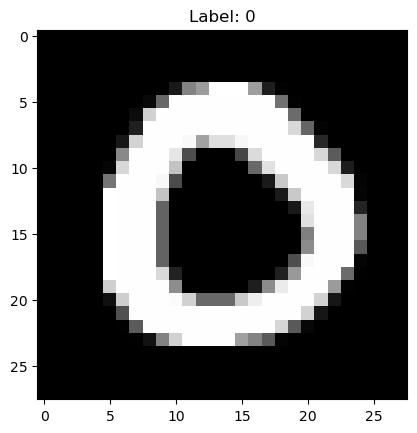

In [18]:
# Display the image in the dataset
plt.imshow(images[4], cmap='gray')
plt.title(f'Label: {labels[4]}')
plt.show()

In [19]:
# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.1, random_state=42
)

In [20]:
# Expand dimensions to match input shape (batch_size, height, width, channels)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  
])

C:\Users\Hxtreme\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.8861 - loss: 0.3778 - val_accuracy: 0.9738 - val_loss: 0.0848
Epoch 2/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9807 - loss: 0.0637 - val_accuracy: 0.9812 - val_loss: 0.0628
Epoch 3/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9887 - loss: 0.0368 - val_accuracy: 0.9802 - val_loss: 0.0624
Epoch 4/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9925 - loss: 0.0245 - val_accuracy: 0.9850 - val_loss: 0.0504
Epoch 5/5
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9869 - val_loss: 0.0468


In [23]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

Test accuracy: 0.9869


In [27]:
model.save('digit_recognition_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


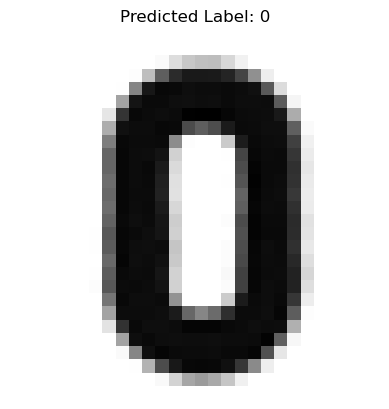

The model predicts this digit is: 0


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

image_path = "C:/Users/Hxtreme/OneDrive - Neuralgo/Documents/Ishan/0.png"  
image = Image.open(image_path)

# Converting to grayscale
if image.mode != 'L':
    image = image.convert('L')

# Resize to 28x28 pixels
image = image.resize((28, 28))

# Convert image to numpy array
image_array = np.array(image)

image_array = image_array / 255.0

# Reshape to match input shape
image_array = image_array.reshape(1, 28, 28, 1)

model = tf.keras.models.load_model('digit_recognition_model.h5') 

predictions = model.predict(image_array)
predicted_label = np.argmax(predictions, axis=1)[0]

plt.imshow(image_array.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

print(f'The model predicts this digit is: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


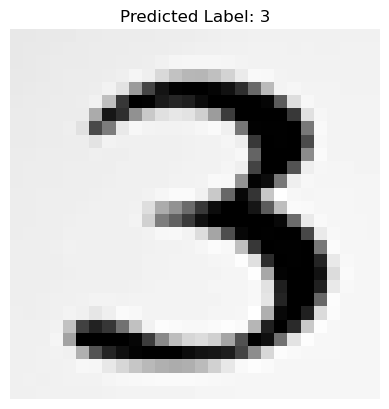

The model predicts this digit is: 3


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

image_path = "C:/Users/Hxtreme/OneDrive - Neuralgo/Documents/Ishan/3.png" 
image = Image.open(image_path)

# Convert to grayscale
if image.mode != 'L':
    image = image.convert('L')

# Resize to 28x28 pixels
image = image.resize((28, 28))

image_array = np.array(image)

# Normalize pixel values
image_array = image_array / 255.0

# Reshape to match input shape
image_array = image_array.reshape(1, 28, 28, 1)

model = tf.keras.models.load_model('digit_recognition_model.h5')  

predictions = model.predict(image_array)
predicted_label = np.argmax(predictions, axis=1)[0]

plt.imshow(image_array.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

print(f'The model predicts this digit is: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


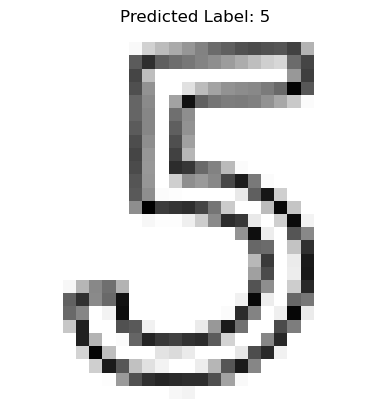

The model predicts this digit is: 5


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

image_path = "C:/Users/Hxtreme/OneDrive - Neuralgo/Documents/Ishan/5.png" 
image = Image.open(image_path)

# Convert to grayscale
if image.mode != 'L':
    image = image.convert('L')

# Resize to 28x28 pixels
image = image.resize((28, 28))

image_array = np.array(image)

# Normalize pixel values
image_array = image_array / 255.0

# Reshape to match input shape
image_array = image_array.reshape(1, 28, 28, 1)

model = tf.keras.models.load_model('digit_recognition_model.h5')  

predictions = model.predict(image_array)
predicted_label = np.argmax(predictions, axis=1)[0]

plt.imshow(image_array.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

print(f'The model predicts this digit is: {predicted_label}')